In [1]:
#Import Database

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import time
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV, LassoLarsIC, RidgeCV, Ridge
from sklearn import datasets
from sklearn.preprocessing import Imputer

/home/hzn/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#Import train data
train_df = pd.read_csv('train_2016.csv',parse_dates=["transactiondate"])

In [6]:
train_df.head()
print(train_df.shape)

(90811, 3)


In [3]:
#Import features
prop_df = pd.read_csv("properties_2016.csv")

FileNotFoundError: File b'properties_2016.csv' does not exist

In [11]:
print(prop_df.shape)
prop_df.head()

(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [178]:
train_df['transaction_month'] = train_df['transactiondate'].dt.month

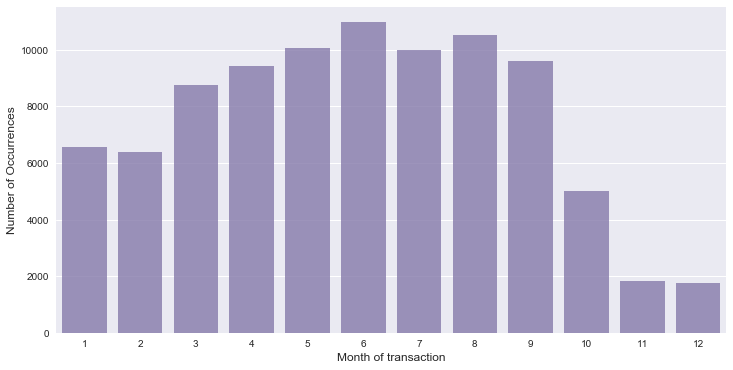

In [24]:
color = sns.color_palette()
cnt_srs = train_df['transaction_month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xlabel('Month of transaction', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

##### Pre-Clean

In [179]:
#Merge two files and get a master file:
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [30]:
#Missing Value Ratio
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]

In [38]:
pd.options.display.max_rows = 65
result = missing_df.sort('missing_ratio')
result

/Users/hanfeimao/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,column_name,missing_count,missing_ratio
0,parcelid,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,transaction_month,0,0.000000
28,longitude,536,0.005902
36,propertylandusetypeid,536,0.005902
38,rawcensustractandblock,536,0.005902
40,regionidcounty,536,0.005902
43,roomcnt,536,0.005902
20,fips,536,0.005902


/Users/hanfeimao/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


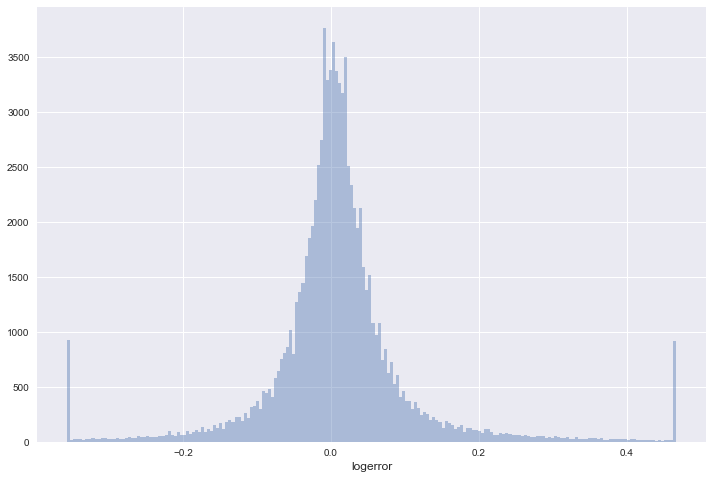

In [41]:
#Label outliers
ulimit = np.percentile(train_df.logerror.values, 99.9)
llimit = np.percentile(train_df.logerror.values, 0.1)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, bins=200, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

##### Performance Measurement

In [42]:
#mean absolute 
def plot_score(y,y_hat):
    return(np.mean(abs(y-y_hat)))

In [180]:
plot_score(train_df['logerror'],np.zeros(len(train_df['logerror'])))

0.06931706070851183

In [50]:
for i in range(1,13):
    print(np.median(train_df[train_df['transaction_month']==i]['logerror']))

0.009
0.008
0.001
0.003
0.003
0.004
0.005
0.005
0.01
0.01
0.0119
0.01


In [181]:
plot_score(temp,0.005+np.zeros(len(temp)))

0.053700431514011424

##### Feature to use

In [98]:
x_train = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'propertyzoningdesc', 'propertycountylandusecode',
                        'outlier','finishedsquarefeet50','finishedsquarefeet15','yardbuildingsqft17','hashottuborspa',
                         'taxdelinquencyflag','taxdelinquencyyear','pooltypeid2','pooltypeid10','poolsizesum',
                         'decktypeid','finishedsquarefeet6','typeconstructiontypeid','architecturalstyletypeid',
                         'fireplaceflag','yardbuildingsqft26','storytypeid','basementsqft','finishedsquarefeet13',
                         'buildingclasstypeid'], axis=1)
features = x_train.columns

##### Classifier to tell if it's an outlier

In [182]:
#outlier labeling
ulimit = np.percentile(train_df.logerror.values, 99)
llimit = np.percentile(train_df.logerror.values, 1)

train_df['outlier']=0
train_df.loc[train_df['logerror']>ulimit,'outlier'] = 1   # larger than 99%
train_df.loc[train_df['logerror']<llimit,'outlier'] = -1  # less than 1%

In [193]:
#random forest classifier
X = train_df.fillna(0).copy()
Y = train_df['outlier']
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [221]:
param_grid = {'n_estimators': [100,300,500,1000], 'max_features': [10,15,20],'max_depth':[5,10,15]}
rfr = GridSearchCV(estimator=RandomForestClassifier(), 
                   fit_params = {'sample_weight': np.array([30 if i != 0 else 1 for i in y_train])},
                   param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
rfr.fit(X_train[features], y_train)
print(rfr.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 122.2min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=15, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [222]:
rfr.best_score_

0.97661325845171232

In [223]:
df = X_test.copy()
df['y']=y_test
df['y_hat']=rfr.predict(X_test[features])
df.loc[df['y_hat']==1,'prediction'] = np.mean(X_train[X_train['outlier']==1]['logerror'])
df.loc[df['y_hat']==-1,'prediction'] = np.mean(X_train[X_train['outlier']==-1]['logerror'])
df.loc[df['y_hat']==0,'prediction'] = np.mean(X_train[X_train['outlier']==0]['logerror'])
print(plot_score(df['logerror'],df['prediction']))
print(plot_score(df['logerror'],np.mean(X_train['logerror'])+np.zeros(len(df['logerror']))))

0.07523563460369073
0.07302729174354639
